In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

### 1.3

In [3]:
data = pd.DataFrame({
    "Patient": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "Before": [9.1, 8.0, 7.7, 10.0, 9.6, 7.9, 9.0, 7.1, 8.3, 9.6, 8.2, 9.2, 7.3, 8.5, 9.5],
    "After": [8.2, 6.4, 6.6, 8.5, 8.0, 5.8, 7.8, 7.2, 6.7, 9.8, 7.1, 7.7, 6.0, 6.6, 8.4],
})

In [4]:
# median method on data frame
data.median()
print(data.median())

Patient    8.0
Before     8.5
After      7.2
dtype: float64


In [5]:
# sample standard deviation method on data frame by column
std_Before = data["Before"].std(ddof=1)
std_After = data["After"].std(ddof=1)
print("std Before:", std_Before) #normal print formatting , separator
print(f"std After: {std_After:.1f}") #fstring formatting {} for variables with .1f for 1 decimal places

std Before: 0.9023778112773574
std After: 1.1


In [6]:
np.cov(data["Before"], data["After"], ddof=1)

array([[0.81428571, 0.79642857],
       [0.79642857, 1.18838095]])

In [7]:
Corr = np.corrcoef(data["Before"], data["After"])
print(Corr)

[[1.        0.8096188]
 [0.8096188 1.       ]]


In [8]:
data["Difference"] = pd.DataFrame(data["Before"] - data["After"])
data["Difference"]

0     0.9
1     1.6
2     1.1
3     1.5
4     1.6
5     2.1
6     1.2
7    -0.1
8     1.6
9    -0.2
10    1.1
11    1.5
12    1.3
13    1.9
14    1.1
Name: Difference, dtype: float64

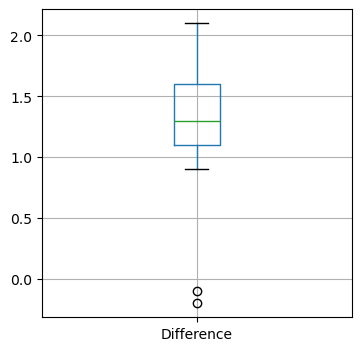

In [9]:
data.boxplot(column=["Difference"], figsize=(4, 4))
plt.show()

In [10]:
Diff_stats = data["Difference"].describe()
print(Diff_stats)

count    15.000000
mean      1.213333
std       0.640164
min      -0.200000
25%       1.100000
50%       1.300000
75%       1.600000
max       2.100000
Name: Difference, dtype: float64


In [11]:
print(data["Difference"].var())

0.4098095238095241


### 2.2

In [12]:
mean = stats.binom.mean(n=250, p=0.8)
print(mean)

200.0


In [13]:
std = stats.binom.std(n=250, p=0.8)
print(std)

6.324555320336756


### 2.4

In [14]:
chance = stats.hypergeom.pmf(M=20, n=6, N=3, k=0)
print(chance)

0.3192982456140351


### 2.6

In [15]:
mean = stats.hypergeom.mean(M=20, n=6, N=3)
print(mean)

0.9


In [16]:
var = stats.hypergeom.var(M=20, n=6, N=3)
print(var)

0.5636842105263158


### 2.7

In [17]:
chance = stats.poisson.sf(k=5, mu=1.6) #survival function (1-cdf)
print(chance)

0.006040291111581372


In [18]:
periods = 5
chance = stats.poisson.cdf(k=8, mu=1.6*periods)
print(chance)

0.5925473414375915


### 2.8

In [19]:
# Calls per hour = 180, so per 5 minutes: (180 calls/hour) * (5/60 hours) = 15 calls/5min
mu = 15  # expected calls per 5 minutes

# Probability of 20 or more calls in 5 minutes (capacity exceeded)
prob_exceeded = stats.poisson.sf(19, mu)
print(f"Probability capacity is exceeded: {prob_exceeded:.4f}")

Probability capacity is exceeded: 0.1248


In [20]:
stats.poisson.ppf(q=0.99, mu=15) #inverse of cdf

np.float64(25.0)

for 99% of all answers to be answered with avereage 15 calls pr 5 min capacity should be at least 25

### 2.1

Using the function `stats.binom.pmf(4, 10, 0.6)` we get a number what distribution is used and what does the output mean?

In [23]:
print(stats.binom.pmf(4, 10, 0.6))

0.11147673600000009


We use the scipy stats to do a probability mass funtion (pmf) using the binomial distribution (binom) for binom the augments are (k, n, p)
<br> p = chance of succes each draw = 0.6 <br> n = number of independent draws = 10 <br> k = x = wanted/expected success = 4

the number given thus means that in 10 draws the chance of 4 successes is aprrox 11%

### 1.4 

Start on ETF Project